In [1]:
import polars as pl
import matplotlib.pyplot as plt
import hvplot.polars

from src.sec_8k_preprocess import preprocess_sec_8k, load_8k_filings, parse_8k_filing, parse_item_8k_filings, preprocess_sec_8k_nlp
from src.iti_8k_merge import merge_8k_nlp_iti
from src.iti_preprocess import prepare_ITI_data

%load_ext autoreload
%autoreload 2

In [2]:
df_nlp_test = preprocess_sec_8k_nlp()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01.parquet


In [12]:
df_nlp_test.select(pl.col('item_txt')).row(10)

('Other Events.\n\nAmerican Biltrite Inc.\'s majority-owned subsidiary Congoleum Corporation\n("Congoleum") announced on April 22, 2005 that it has reached an agreement in\nprinciple with representatives of the Asbestos Claimants\' Committee and the\nFuture Claimants\' Representative to make certain modifications to Congoleum\'s\nproposed Chapter 11 plan of reorganization and related documents governing the\nsettlement and payment of asbestos related claims against Congoleum. Congoleum\nfurther stated that, under the agreed-upon modifications, asbestos claimants\nwith claims settled under Congoleum\'s pre-petition settlement agreement would\nagree to forego the security interest they were granted and share on a pari\npassu basis with all other present and future asbestos claimants in insurance\nproceeds and other assets of the trust to be formed to pay asbestos claims\nagainst Congoleum. As a result of these changes, Congoleum will be preparing an\namended plan and disclosure statement

In [4]:
df_nlp = merge_8k_nlp_iti()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01.parquet


In [24]:
df_nlp_test.filter((pl.col('sentiment_score')) <=0)

permno,filing_date,report_date,report_year,days_between_report_and_filing,sentiment_score,item_txt
i64,date,date,i32,i32,f32,str
38149,2012-10-29,2012-10-24,2012,5,-0.688754,"""Other Events. On October 24, 2…"
15721,2009-10-27,2009-10-26,2009,1,-0.630227,"""OTHER EVENTS The RICHMOND ha…"
83875,2008-09-04,2008-09-02,2008,2,-0.48604,"""Other Events On September 2,…"
21726,2008-01-07,2008-01-04,2008,3,-0.810749,"""Other Events. On January 4, …"
23975,2008-10-03,2008-10-01,2008,2,-0.904007,"""Other Events 8.01 On Oct…"
…,…,…,…,…,…,…
14062,2014-09-04,2014-09-02,2014,2,-0.3279,"""Other Events. On September 2…"
14062,2014-04-15,2014-04-11,2014,4,-0.287243,"""Other Events. On April 11, 2…"
78916,2019-02-08,2019-02-05,2019,3,-0.512359,""" Other Events. On February 5…"


In [5]:
from src.utils.event_study import event_study

# remove rows with no filing date
df_events = df_nlp.filter(pl.col('filing_date').is_not_null())
df_events = df_events.rename({'report_date': 'event_date'})
df_events = df_events.select(['permno', 'event_date'])
df_events

permno,event_date
i64,date
10002,2008-05-07
10025,2005-02-10
10025,2005-10-28
10025,2007-03-07
10025,2007-05-02
…,…
93418,2013-11-04
93420,2012-09-05
93428,2010-10-12


In [ ]:
item_8_01_results_iti = event_study(
    df_events=df_events.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject = 'ITI')

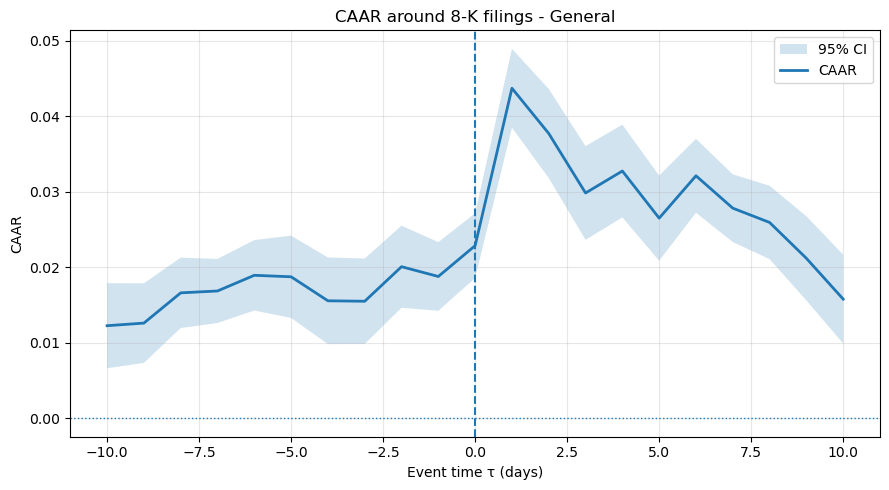

In [ ]:
from src.utils.event_study import compute_caar_ci, plot_caar_ci

item_8_01_caar_iti = compute_caar_ci(item_8_01_results_iti)
plot_caar_ci(item_8_01_caar_iti, title='CAAR around 8.01 8-K filings items - ITI')

In [18]:
item_8_01_results_returns = event_study(
    df_events=df_events.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject = 'returns')

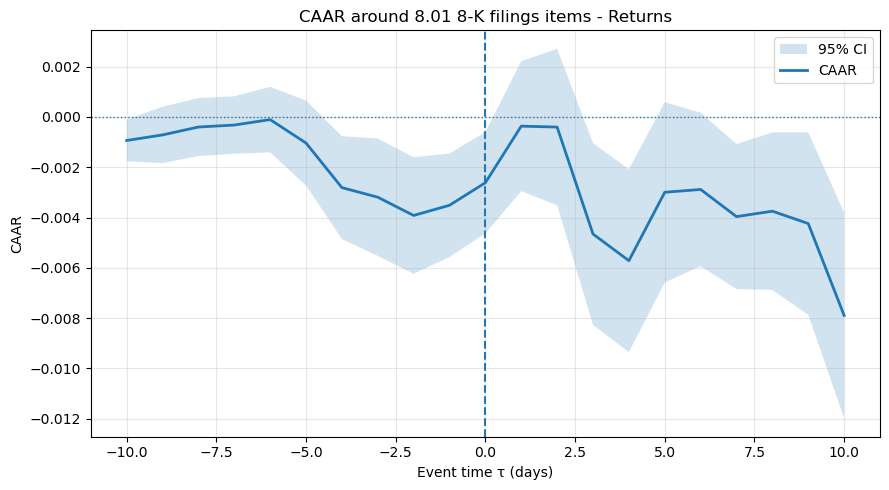

In [20]:
item_8_01_caar_returns = compute_caar_ci(item_8_01_results_returns)
plot_caar_ci(item_8_01_caar_returns, title='CAAR around 8.01 8-K filings items - Returns')

In [34]:
sentiment_df = df_nlp.filter(pl.col('sentiment_score').is_not_null()).select(['permno', 'filing_date', 'sentiment_score'])
sentiment_df = sentiment_df.rename({'filing_date': 'event_date'})
sentiment_df

permno,event_date,sentiment_score
i64,date,f32
10002,2008-05-13,0.703063
10025,2005-02-16,0.443708
10025,2005-11-03,0.920724
10025,2007-03-09,0.850439
10025,2007-05-04,0.920052
…,…,…
93418,2013-11-05,0.699858
93420,2012-09-07,0.912029
93428,2010-10-14,0.695255


In [35]:
# select top 25% sentiment scores
df_sent_top_25 = sentiment_df.filter(pl.col('sentiment_score') >= sentiment_df.select(pl.col('sentiment_score').quantile(0.75)).item())
df_sent_top_25

permno,event_date,sentiment_score
i64,date,f32
10025,2005-11-03,0.920724
10025,2007-05-04,0.920052
10025,2014-04-21,0.924341
10025,2016-09-14,0.921494
10025,2017-01-19,0.928123
…,…,…
93418,2012-08-14,0.927862
93418,2012-08-23,0.924938
93418,2012-09-07,0.92185


In [36]:
# select bottom 25% sentiment scores
df_sent_bottom_25 = sentiment_df.filter(pl.col('sentiment_score') <= sentiment_df.select(pl.col('sentiment_score').quantile(0.25)).item())
df_sent_bottom_25

permno,event_date,sentiment_score
i64,date,f32
10002,2008-05-13,0.703063
10025,2005-02-16,0.443708
10025,2008-09-02,0.679493
10051,2015-03-23,0.435962
10078,2007-08-07,0.669126
…,…,…
93295,2017-06-05,0.718792
93300,2011-04-20,0.397128
93398,2014-06-30,-0.238195


In [37]:
# select middle 50% sentiment scores
df_sent_middle_50 = sentiment_df.filter(
    (pl.col('sentiment_score') > sentiment_df.select(pl.col('sentiment_score').quantile(0.25)).item()) &
    (pl.col('sentiment_score') < sentiment_df.select(pl.col('sentiment_score').quantile(0.75)).item())
)
df_sent_middle_50

permno,event_date,sentiment_score
i64,date,f32
10025,2007-03-09,0.850439
10025,2011-06-21,0.866893
10025,2014-02-06,0.898737
10025,2014-04-11,0.829189
10025,2016-10-11,0.895589
…,…,…
93400,2014-02-21,0.856144
93418,2011-09-13,0.891405
93418,2012-08-07,0.898889


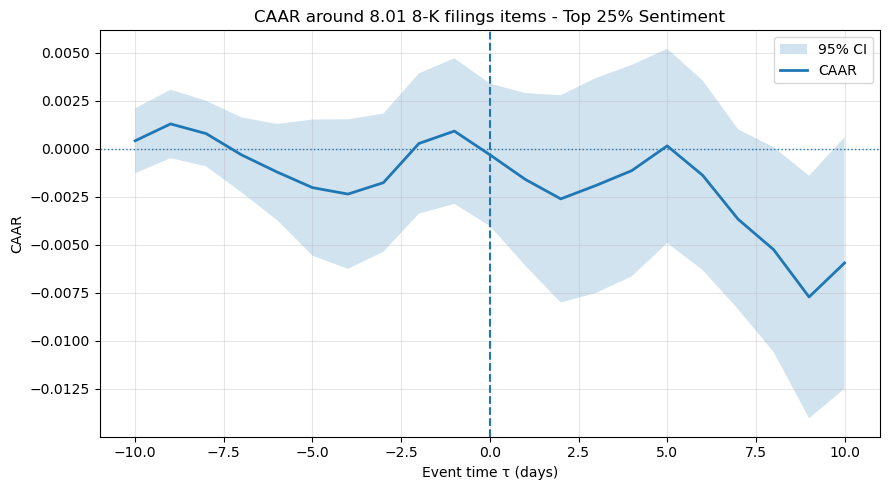

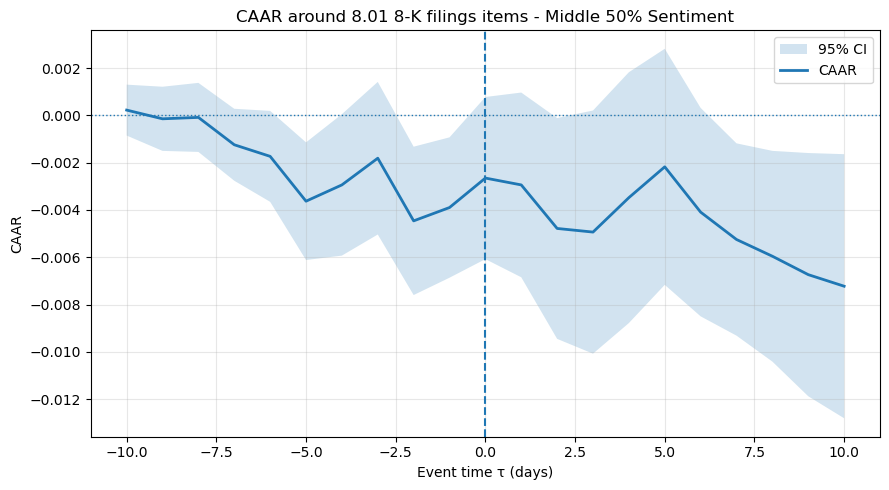

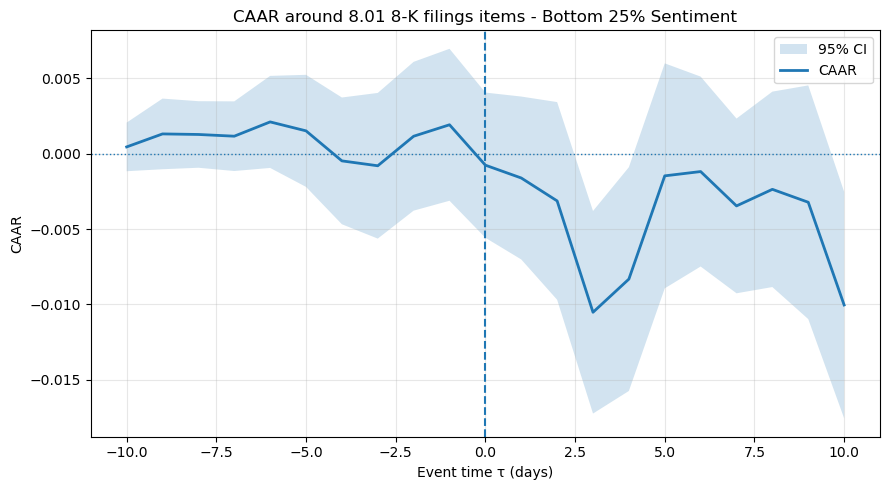

In [38]:
for df_sent, label in zip([df_sent_top_25, df_sent_middle_50, df_sent_bottom_25], ['Top 25% Sentiment', 'Middle 50% Sentiment', 'Bottom 25% Sentiment']):
    results = event_study(
        df_events=df_sent.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
    caar = compute_caar_ci(results)
    plot_caar_ci(caar, title=f'CAAR around 8.01 8-K filings items - {label}')

In [1]:
from src.iti_8k_merge import merge_8k_iti
df_8k_iti = merge_8k_iti()

 Parquet file exists at data/preprocessed/submissions_8k.parquet. Reading...
Connecting to WRDS as williamandwing...
postgresql://williamandwing:@wrds-pgdata.wharton.upenn.edu:9737/wrds
Loading library list...
Done
Number of rows with missing permno: 0


In [2]:
# Filter to filings with ITI and days_between_report_and_filing <= 4
df_8k_iti_filter = df_8k_iti.filter(pl.col('days_between_report_and_filing') <= 4)

NameError: name 'pl' is not defined

In [ ]:
df_8k_iti_filter

permno,date,ITI(13D),ITI(impatient),ITI(patient),ITI(insider),ITI(short),filing_date,report_year,days_between_report_and_filing,url_txt,items
i64,date,f64,f64,f64,f64,f64,date,i32,i32,str,str
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7"""
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7"""
10002,2004-07-27,0.273682,0.359786,0.118498,null,0.406659,2004-07-28,2004,1,"""https://www.sec.gov/Archives/e…","""12"""
10002,2004-10-27,0.0972562,0.365818,0.083833,0.442416,0.387595,2004-10-28,2004,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01"""
10002,2005-01-24,0.6367818,0.589579,0.4031058,null,0.4429599,2005-01-27,2005,3,"""https://www.sec.gov/Archives/e…","""2.02,9.01"""
…,…,…,…,…,…,…,…,…,…,…,…
93428,2014-09-22,null,null,null,0.5782608,0.3498985,2014-09-23,2014,1,"""https://www.sec.gov/Archives/e…","""5.02"""
93428,2014-11-04,0.281972,0.239654,0.2947011,0.619906,0.391028,2014-11-05,2014,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01"""
93435,2011-03-07,0.187343,0.2992311,0.33558,0.468232,0.34459,2011-03-11,2011,4,"""https://www.sec.gov/Archives/e…","""5.02,9.01"""


In [74]:
item_to_section = {
    "1.01": "Registrant's Business and Operations",
    "1.02": "Registrant's Business and Operations",
    "1.03": "Registrant's Business and Operations",

    "2.01": "Financial Information",
    "2.02": "Financial Information",
    "2.03": "Financial Information",
    "2.04": "Financial Information",
    "2.05": "Financial Information",
    "2.06": "Financial Information",

    "3.01": "Securities and Trading Markets",
    "3.02": "Securities and Trading Markets",
    "3.03": "Securities and Trading Markets",

    "4.01": "Matters Related to Accountants and Financial Statements",
    "4.02": "Matters Related to Accountants and Financial Statements",

    "5.01": "Corporate Governance and Management",
    "5.02": "Corporate Governance and Management",
    "5.03": "Corporate Governance and Management",
    "5.04": "Corporate Governance and Management",
    "5.05": "Corporate Governance and Management",
    "5.06": "Corporate Governance and Management",
    "5.07": "Corporate Governance and Management",

    "6.01": "Asset-Backed Securities",
    "6.02": "Asset-Backed Securities",
    "6.03": "Asset-Backed Securities",
    "6.04": "Asset-Backed Securities",
    "6.05": "Asset-Backed Securities",

    "7.01": "Regulation FD",

    "8.01": "Other Events",

    "9.01": "Financial Statements and Exhibits"
}

sections_list = set()
for k, v in item_to_section.items():
    sections_list.add(v)
sections_list = list(sections_list)

In [51]:
# count number of filings per section
# map item numbers (possibly comma-separated) to section names using item_to_section dict
def _map_item_to_section(item_str):
    if item_str is None:
        return None
    # handle multiple items like "2.02,9.01"
    items = [s.strip() for s in str(item_str).split(',') if s.strip()]
    sections = [item_to_section.get(it) for it in items]
    # keep order, remove None and duplicates
    sections = [s for s in dict.fromkeys(sections) if s]
    return ', '.join(sections) if sections else None

df_8k_iti_filter = df_8k_iti_filter.with_columns(
    pl.col('items').map_elements(_map_item_to_section).alias('item_section')
)
df_8k_iti_filter

permno,date,ITI(13D),ITI(impatient),ITI(patient),ITI(insider),ITI(short),filing_date,report_year,days_between_report_and_filing,url_txt,items,item_section
i64,date,f64,f64,f64,f64,f64,date,i32,i32,str,str,str
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7""",null
10002,2004-02-12,0.079014,0.102983,0.051119,0.2189175,0.276776,2004-02-13,2004,1,"""https://www.sec.gov/Archives/e…","""12,7""",null
10002,2004-07-27,0.273682,0.359786,0.118498,null,0.406659,2004-07-28,2004,1,"""https://www.sec.gov/Archives/e…","""12""",null
10002,2004-10-27,0.0972562,0.365818,0.083833,0.442416,0.387595,2004-10-28,2004,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01""","""Financial Information, Financi…"
10002,2005-01-24,0.6367818,0.589579,0.4031058,null,0.4429599,2005-01-27,2005,3,"""https://www.sec.gov/Archives/e…","""2.02,9.01""","""Financial Information, Financi…"
…,…,…,…,…,…,…,…,…,…,…,…,…
93428,2014-09-22,null,null,null,0.5782608,0.3498985,2014-09-23,2014,1,"""https://www.sec.gov/Archives/e…","""5.02""","""Corporate Governance and Manag…"
93428,2014-11-04,0.281972,0.239654,0.2947011,0.619906,0.391028,2014-11-05,2014,1,"""https://www.sec.gov/Archives/e…","""2.02,9.01""","""Financial Information, Financi…"
93435,2011-03-07,0.187343,0.2992311,0.33558,0.468232,0.34459,2011-03-11,2011,4,"""https://www.sec.gov/Archives/e…","""5.02,9.01""","""Corporate Governance and Manag…"


In [ ]:
# keep only non nan item_section
df_8k_iti_filter = df_8k_iti_filter.filter(pl.col('item_section').is_not_null())

df_item_events = df_8k_iti_filter.select(pl.col('date'), pl.col('permno')).unique()
df_item_events = df_item_events.rename({'date': 'event_date'})

item_results = event_study(
    df_events=df_item_events.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject='ITI')

In [79]:
def plot_caar_ci_multi(df, tau_col='tau', type='ITI', title=f'CAAR {type} by section'):
    plt.figure(figsize=(10,6))

    for section, subdf in df.groupby('section'):
        # Plot CAAR mean
        plt.plot(
            subdf[tau_col],
            subdf['mean_CAR'],
            linewidth=2,
            label=f'{section}'
        )

        # Optional: confidence interval band
        plt.fill_between(
            subdf[tau_col],
            subdf['ci_low'],
            subdf['ci_high'],
            alpha=0.15
        )

    plt.axvline(0, linestyle='--')
    plt.axhline(0, linestyle=':', lw=1)

    plt.xlabel("Event time τ (days)")
    plt.ylabel(f"CAAR ({type})")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

Processing section: Securities and Trading Markets with 2452 events
Processing section: Matters Related to Accountants and Financial Statements with 734 events
Processing section: Other Events with 17075 events
Processing section: Corporate Governance and Management with 20435 events
Processing section: Regulation FD with 9059 events
Processing section: Financial Statements and Exhibits with 44956 events
Processing section: Financial Information with 17130 events
Processing section: Registrant's Business and Operations with 14561 events
Processing section: Asset-Backed Securities with 1 events


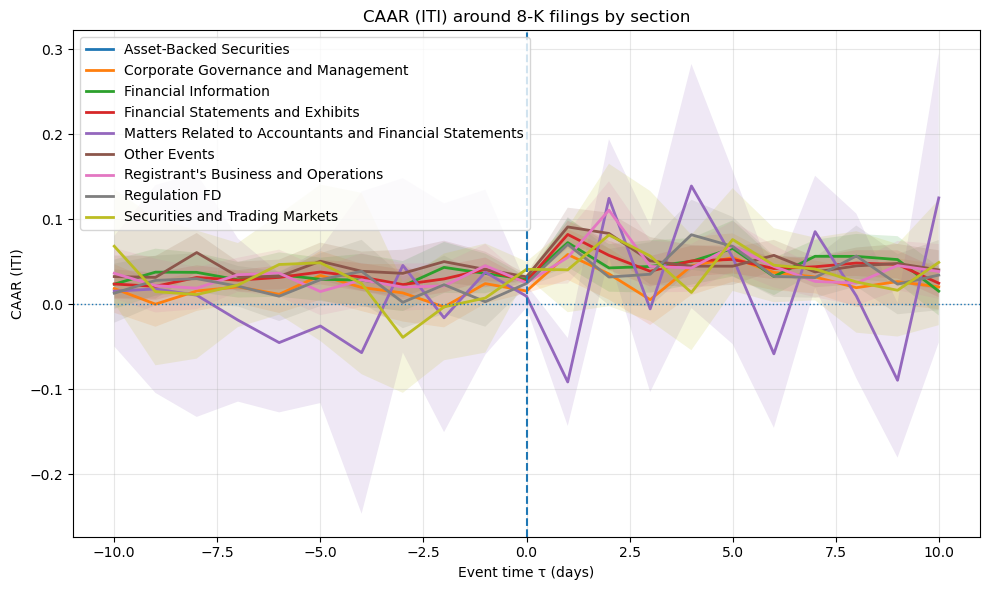

In [80]:
import pandas as pd

all_sections_caar = []

for section in sections_list:
    # Filter rows matching the section
    df_section = df_8k_iti_filter.filter(pl.col('item_section').str.contains(section))
    df_section = df_section.select(['permno', 'date'])
    print(f"Processing section: {section} with {df_section.height} events")

    # Compute CAAR for *that* subsample
    specific_item_results = item_results.merge(
        df_section.to_pandas(),
        on=['permno', 'date'],
        how='inner'
    )
    caar_general = compute_caar_ci(specific_item_results)

    # Add a column with the section name
    caar_general['section'] = section

    # Append to list
    all_sections_caar.append(caar_general)

# Concatenate all results
all_sections_caar = pd.concat(all_sections_caar, ignore_index=True)

plot_caar_ci_multi(all_sections_caar,
                   title="CAAR (ITI) around 8-K filings by section",
                   type='ITI')


In [76]:
item_results_returns = event_study(
    df_events=df_item_events.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject='returns')

Processing section: Securities and Trading Markets with 2452 events
Processing section: Matters Related to Accountants and Financial Statements with 734 events
Processing section: Other Events with 17075 events
Processing section: Corporate Governance and Management with 20435 events
Processing section: Regulation FD with 9059 events
Processing section: Financial Statements and Exhibits with 44956 events
Processing section: Financial Information with 17130 events
Processing section: Registrant's Business and Operations with 14561 events
Processing section: Asset-Backed Securities with 1 events


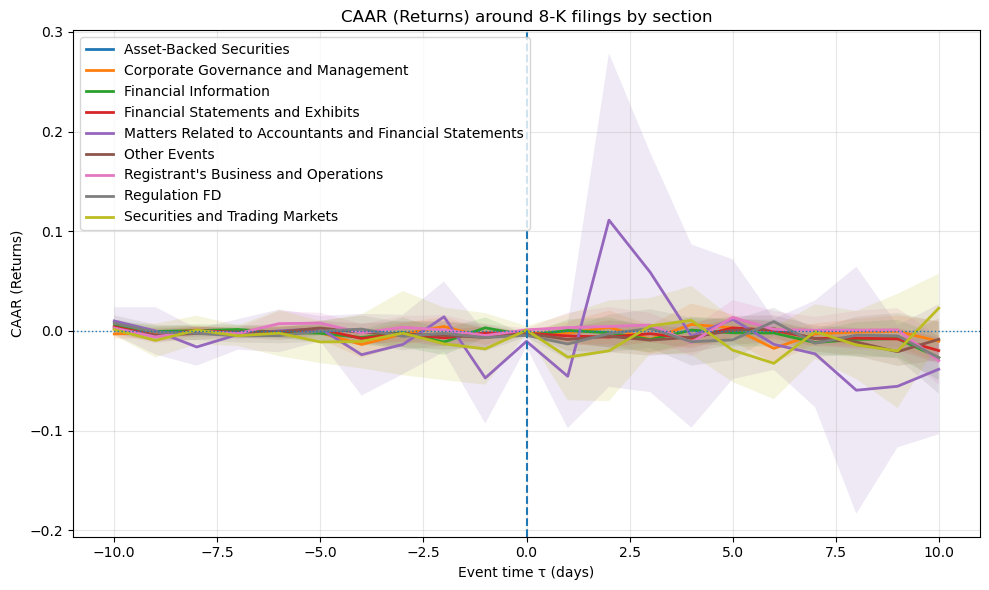

In [81]:
all_sections_caar = []

for section in sections_list:
    # Filter rows matching the section
    df_section = df_8k_iti_filter.filter(pl.col('item_section').str.contains(section))
    df_section = df_section.select(['permno', 'date'])
    print(f"Processing section: {section} with {df_section.height} events")

    # Compute CAAR for *that* subsample
    specific_item_results_returns = item_results_returns.merge(
        df_section.to_pandas(),
        on=['permno', 'date'],
        how='inner'
    )
    caar_general = compute_caar_ci(specific_item_results_returns)

    # Add a column with the section name
    caar_general['section'] = section

    # Append to list
    all_sections_caar.append(caar_general)

# Concatenate all results
all_sections_caar = pd.concat(all_sections_caar, ignore_index=True)

plot_caar_ci_multi(all_sections_caar,
                   title="CAAR (Returns) around 8-K filings by section",
                   type='Returns')